# Air emissions accounts for greenhouse gases - European Union (2010-2022)

### Database interpretation

Quarters - Year and quarter

PCH_SM - Percentage change compared to same period in previous year

THS_T - Thousand tonnes

T_HAB - Tonnes pre capita

### Economic Activities

A - Agriculture, Forestry and Fishing

B - Mining and Quarrying

C - Manufacturing

D - Electricity, gas, steam and air conditioning supply

E - Watersupply, sewerage, waste manegement and remediation activities

F - Construction

G - Services (expect transportation and storage)

H - Transportation and storage

TOTAL - All NACE activities plus households

HH - Total activities by households

In [1]:
area = input("Economic Activity:")

Economic Activity:TOTAL


### Preparing data for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table("Databases/greenhouseGasEmissionEU.tsv")
data = data.transpose().reset_index()
data.columns = ["Quarters","PCH_SM_A","THS_T_A","T_HAB_A","PCH_SM_B","THS_T_B","T_HAB_B","PCH_SM_C","THS_T_C","T_HAB_C","PCH_SM_D","THS_T_D","T_HAB_D","PCH_SM_E","THS_T_E","T_HAB_E","PCH_SM_F","THS_T_F","T_HAB_F","PCH_SM_G","THS_T_G","T_HAB_G","PCH_SM_H","THS_T_H","T_HAB_H","PCH_SM_TOTAL","THS_T_TOTAL","T_HAB_TOTAL","PCH_SM_HH","THS_T_HH","T_HAB_HH"]
data = data.replace(' s','', regex=True)
data = pd.concat([pd.DataFrame([pd.to_numeric(data[e],errors='coerce') for e in data.columns if e not in ['Quarters']]).T, data[['Quarters']]],axis=1)
data.tail(10)

,PCH_SM_A,THS_T_A,T_HAB_A,PCH_SM_B,THS_T_B,T_HAB_B,PCH_SM_C,THS_T_C,T_HAB_C,PCH_SM_D,...,PCH_SM_H,THS_T_H,T_HAB_H,PCH_SM_TOTAL,THS_T_TOTAL,T_HAB_TOTAL,PCH_SM_HH,THS_T_HH,T_HAB_HH,Quarters
39,-0.334,122677.599,0.274,-5.578,14054.838,0.031,-2.341,201514.151,0.450,-15.802,...,1.055,120212.406,0.268,-2.429,218159.431,0.487,-4.675,1005800.102,2.244,2019-Q4
40,-0.746,118390.474,0.264,-4.209,12203.206,0.027,-4.758,186833.583,0.417,-17.925,...,-2.169,108465.526,0.242,-5.766,236317.893,0.527,-6.925,963328.084,2.149,2020-Q1
41,-0.967,119347.593,0.266,-14.026,11140.010,0.025,-18.998,164042.191,0.366,-21.403,...,-35.726,77726.936,0.173,-22.306,125357.670,0.280,-18.802,741836.279,1.655,2020-Q2
42,-0.385,122641.846,0.274,-2.635,12434.891,0.028,-4.003,186426.725,0.416,-5.456,...,-19.587,101225.932,0.226,-6.064,119339.727,0.266,-6.123,834008.641,1.861,2020-Q3
43,-1.454,120894.281,0.270,-0.563,13975.743,0.031,0.338,202195.776,0.451,-3.071,...,-20.673,95361.412,0.213,-2.867,211904.215,0.473,-4.162,963934.661,2.150,2020-Q4
44,-0.345,117982.304,0.263,1.114,12339.089,0.028,3.429,193239.721,0.431,8.066,...,-18.215,88708.693,0.198,3.536,244673.429,0.546,1.039,973338.729,2.173,2021-Q1
45,0.742,120233.238,0.269,19.099,13267.685,0.030,26.669,207790.285,0.464,17.099,...,30.212,101209.699,0.226,29.444,162267.841,0.362,19.386,885646.402,1.978,2021-Q2
46,1.636,124648.355,0.278,7.975,13426.595,0.030,7.647,200682.162,0.448,0.479,...,17.257,118694.496,0.265,3.992,124103.735,0.277,5.499,879869.444,1.965,2021-Q3
47,1.449,122646.234,0.274,9.653,15324.870,0.034,6.679,215700.202,0.481,9.477,...,18.791,113280.559,0.253,8.139,229150.248,0.511,8.066,1041686.664,2.325,2021-Q4
48,0.980,119138.364,0.266,14.554,14134.975,0.032,8.685,210022.014,0.469,4.470,...,20.431,106832.477,0.238,0.033,244755.174,0.546,5.634,1028173.582,2.295,2022-Q1


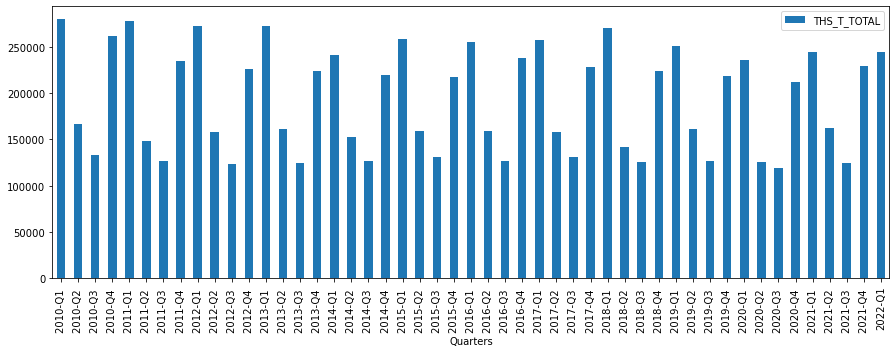

In [3]:
plot = data.plot(kind="bar", x="Quarters", y="THS_T_"+area, rot=90, figsize=(15,5))
fig = plot.get_figure()
fig.savefig('plotBarPlot.png', dpi=100, bbox_inches = "tight")

### Removing covid outliers (2020-Q1 - 2021-Q1)

In [4]:
dataWithoutOutliers = data.drop(data.index[[40,41,42,43,44]])

### Isolating the quarters 1 and 4

Data length: 11


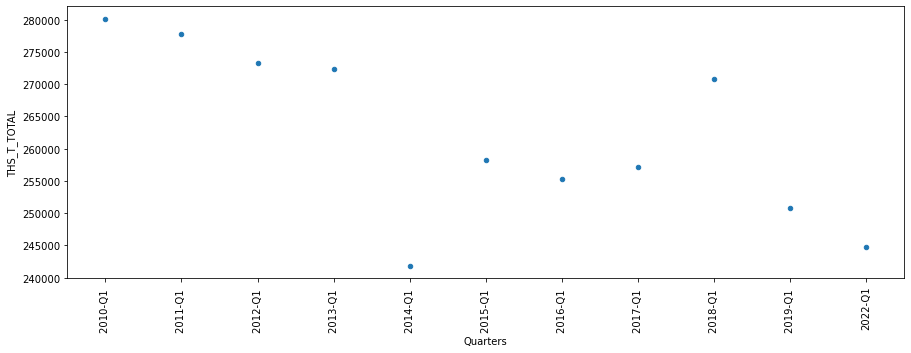

In [5]:
dataQ1Q4 = dataWithoutOutliers[dataWithoutOutliers["Quarters"].str.contains("Q2") == False]
dataQ1Q4 = dataQ1Q4[dataQ1Q4["Quarters"].str.contains("Q3") == False]
dataQ1Q4 = dataQ1Q4[dataQ1Q4["Quarters"].str.contains("Q4") == False]
dataQ1Q4 = dataQ1Q4.reset_index(drop=True)
dataQ1Q4.plot(kind="scatter", x="Quarters", y="THS_T_"+area, rot=90, figsize=(15,5))
print("Data length: {}".format(len(dataQ1Q4)))

### Isolating the quarters 2 and 3

Data length: 22


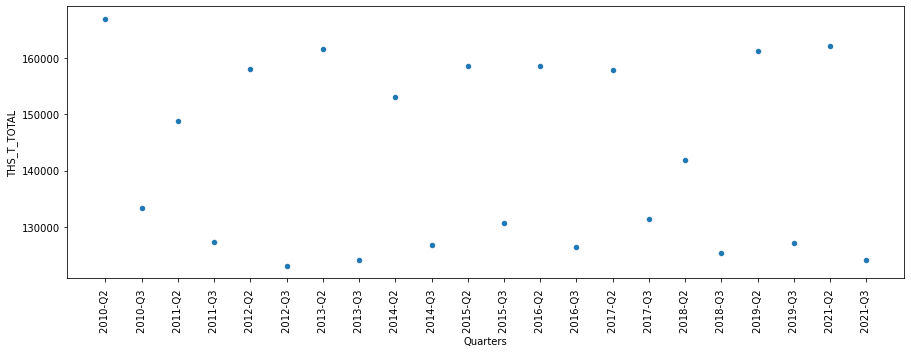

In [6]:
dataQ2Q3 = dataWithoutOutliers[dataWithoutOutliers["Quarters"].str.contains("Q1") == False]
dataQ2Q3 = dataQ2Q3[dataQ2Q3["Quarters"].str.contains("Q4") == False]
dataQ2Q3 = dataQ2Q3.reset_index(drop=True)
dataQ2Q3.plot(kind="scatter", x="Quarters", y="THS_T_"+area, rot=90, figsize=(15,5))
print("Data length: {}".format(len(dataQ2Q3)))

### Polynomial regression function definition

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plotPolynomialRegression(dtframe, initialOrder, finalOrder, predList):
    X = dtframe.index
    Y = dtframe["THS_T_"+area].values
    
    for i, pred in enumerate(predList):
        predList[i] = pred + len(dtframe) - 1
        
    y, MAE, orders, yPred = [], [], range(initialOrder, finalOrder + 1), []
    for order in orders:
        model = np.poly1d(np.polyfit(X, Y, order))
        for pred in predList:
            yPred += [model(pred)]
        y += [model(X)]
    
    plt.figure(figsize=(18.5, 10.5))
    plt.subplots_adjust(hspace=0.5)
    
    nrows = len(orders) // 2 + (len(orders) % 2 > 0)
    ite = 0
    
    for i, order in enumerate(orders):
        ax = plt.subplot(nrows, 2, i + 1)
        ax.scatter(X,Y)
        for pred in predList:
            ax.scatter(pred, yPred[ite], color='yellow')
            ite += 1
        ax.plot(X,y[i], color='red')
        ax.set_title('{}-order function'.format(order))
    
    plt.savefig(input("Nome arquivo .PNG:"))
    plt.show()
    
    print("Dataset Lenght: {}\n".format(len(dtframe) - 1))
    
    ite = 0
    for i, order in enumerate(orders):
        print("Mean Absolute Error ({}-order function) = {:0.4f}".format(order, mean_absolute_error(Y, y[i])))
        print("Mean Squared Error ({}-order function) = {:0.4f}".format(order, np.sqrt(mean_squared_error(Y, y[i]))))
        print("R2 Score ({}-order function) = {:0.4f}".format(order, r2_score(Y, y[i])))
        for pred in predList:
            print("Predicting {} ({}-order function) = {:0.4f}".format(pred, order, yPred[ite]))
            ite += 1
        print("\n")

### Applying polynomial regression in all data (with covid outliers)

Nome arquivo .PNG:teste


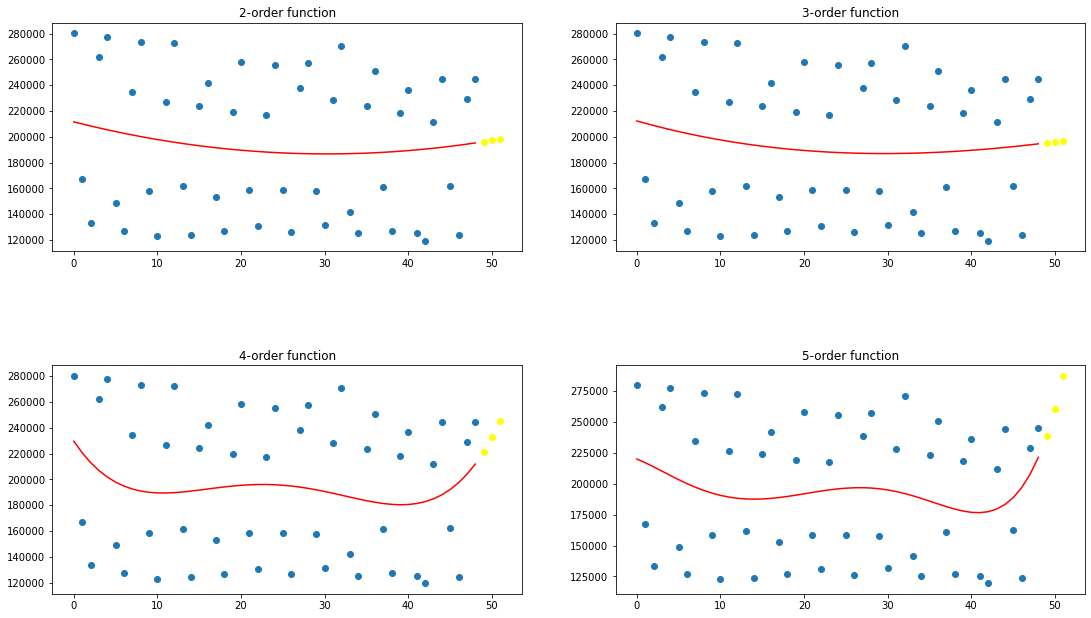

Dataset Lenght: 48

Mean Absolute Error (2-order function) = 51577.2050
Mean Squared Error (2-order function) = 54447.6404
R2 Score (2-order function) = 0.0155
Predicting 49 (2-order function) = 196291.7349
Predicting 50 (2-order function) = 197332.8037
Predicting 51 (2-order function) = 198428.0329


Mean Absolute Error (3-order function) = 51591.6093
Mean Squared Error (3-order function) = 54446.7817
R2 Score (3-order function) = 0.0155
Predicting 49 (3-order function) = 195377.1898
Predicting 50 (3-order function) = 196198.7679
Predicting 51 (3-order function) = 197052.9875


Mean Absolute Error (4-order function) = 51079.4784
Mean Squared Error (4-order function) = 53989.0135
R2 Score (4-order function) = 0.0320
Predicting 49 (4-order function) = 221306.1661
Predicting 50 (4-order function) = 232499.3346
Predicting 51 (4-order function) = 245555.4254


Mean Absolute Error (5-order function) = 50906.0068
Mean Squared Error (5-order function) = 53846.9623
R2 Score (5-order function) 

In [8]:
plotPolynomialRegression(data, 2, 5, [1, 2, 3])

### Applying polynomial regression in 1 and 4 quarters

Nome arquivo .PNG:ABC


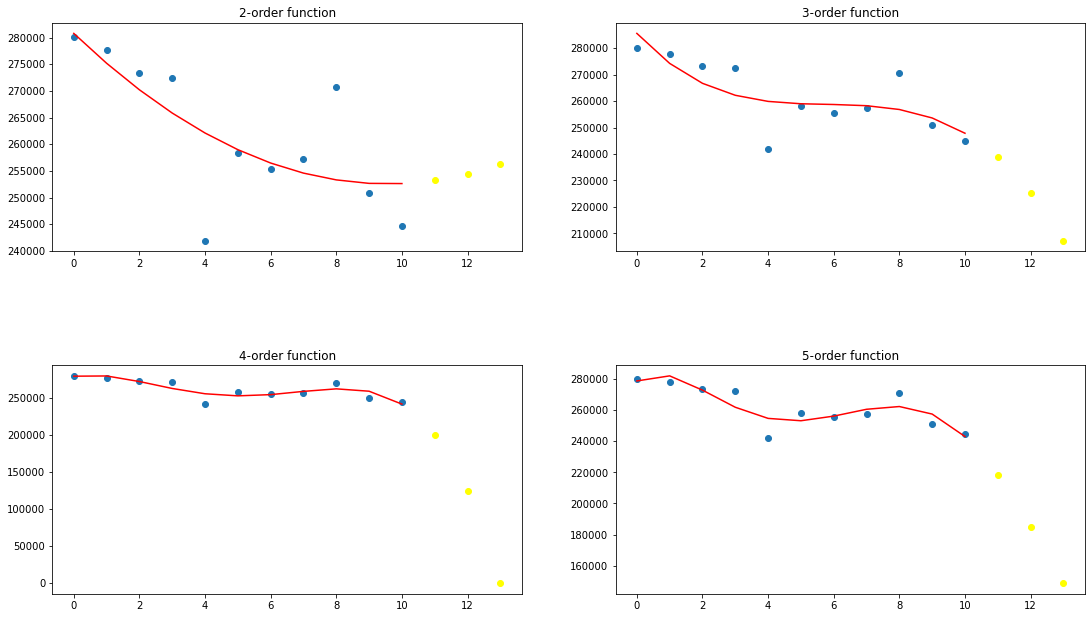

Dataset Lenght: 10

Mean Absolute Error (2-order function) = 5887.8776
Mean Squared Error (2-order function) = 8782.9102
R2 Score (2-order function) = 0.5292
Predicting 11 (2-order function) = 253210.7444
Predicting 12 (2-order function) = 254411.1476
Predicting 13 (2-order function) = 256229.3382


Mean Absolute Error (3-order function) = 6248.5016
Mean Squared Error (3-order function) = 8200.1920
R2 Score (3-order function) = 0.5896
Predicting 11 (3-order function) = 238714.7880
Predicting 12 (3-order function) = 225419.2347
Predicting 13 (3-order function) = 207166.1010


Mean Absolute Error (4-order function) = 4921.6833
Mean Squared Error (4-order function) = 6543.3709
R2 Score (4-order function) = 0.7387
Predicting 11 (4-order function) = 200912.5969
Predicting 12 (4-order function) = 124613.3918
Predicting 13 (4-order function) = -261.3066


Mean Absolute Error (5-order function) = 5064.2348
Mean Squared Error (5-order function) = 6424.7988
R2 Score (5-order function) = 0.7481
P

In [9]:
plotPolynomialRegression(dataQ1Q4, 2, 5, [1, 2, 3])

### Applying polynomial regression in 2 and 3 quarters

Nome arquivo .PNG:DEF


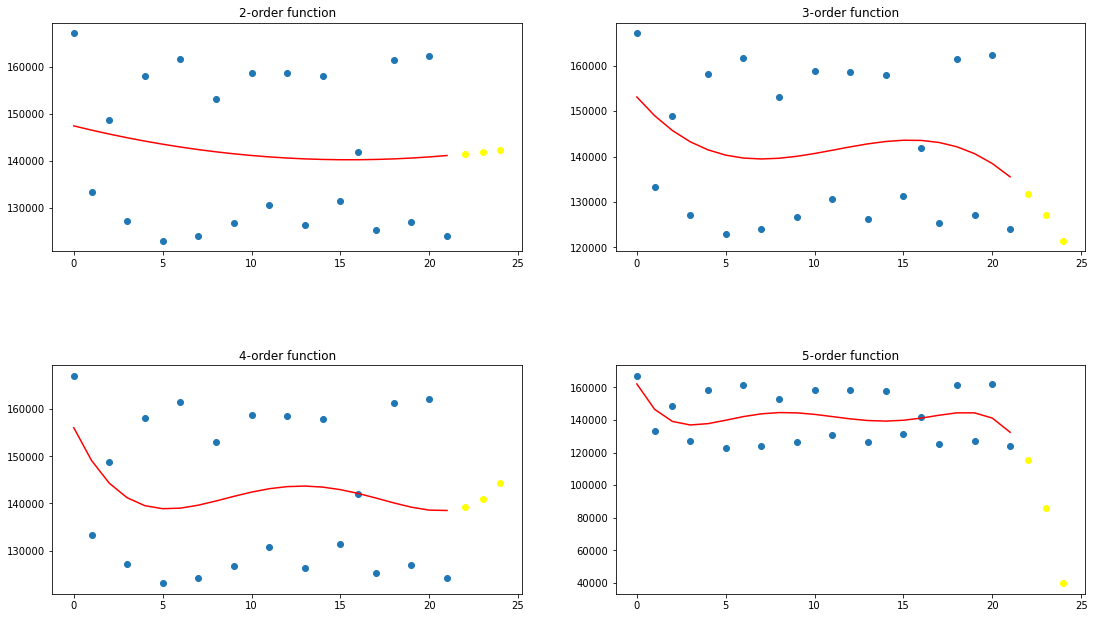

Dataset Lenght: 21

Mean Absolute Error (2-order function) = 14861.9231
Mean Squared Error (2-order function) = 15736.1651
R2 Score (2-order function) = 0.0189
Predicting 22 (2-order function) = 141525.8915
Predicting 23 (2-order function) = 141944.1036
Predicting 24 (2-order function) = 142422.1150


Mean Absolute Error (3-order function) = 14669.1934
Mean Squared Error (3-order function) = 15484.2918
R2 Score (3-order function) = 0.0500
Predicting 22 (3-order function) = 131769.3066
Predicting 23 (3-order function) = 127097.1266
Predicting 24 (3-order function) = 121424.2475


Mean Absolute Error (4-order function) = 14541.4384
Mean Squared Error (4-order function) = 15404.0773
R2 Score (4-order function) = 0.0598
Predicting 22 (4-order function) = 139232.6539
Predicting 23 (4-order function) = 141050.3410
Predicting 24 (4-order function) = 144301.0293


Mean Absolute Error (5-order function) = 13967.6637
Mean Squared Error (5-order function) = 14972.0910
R2 Score (5-order function) 

In [10]:
plotPolynomialRegression(dataQ2Q3, 2, 5, [1, 2, 3])